# Natural Language Processing (NLP)


Natural language processing is a field concerned with the ability of a computer to understand, analyze, manipulate, and potentially generate human language. By human language, we're simply referring to any language used for everyday communication. 


So here are a few examples that you may see on a day to day basis:

>The first would be a spam filter, so this is just where your email server is determining whether an incoming email is spam or not, based on the content of the body, the subject, and maybe the email domain. 

>The second is auto-complete, where Google is basically predicting what you're interested in searching for based on what you've already entered and what others commonly search for with those same phrases. 


NLP is a very broad umbrella that encompasses many topics like the following:

* Sentiment Analysis
* Topic Modeling
* Text Classification
* Sentence Segmentation or Part-or-Speech Tagging

The core component of natural language processing is extracting all the information from a block of text that is relevant to a computer understanding the language.

I used the following command to install NLTK:

- !pip3 install -U nltk

### Download NLTK data

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
pd.set_option('display.max_colwidth', 75)

#### Run it only once, and download everything by selecting them and then clicking on the download.

nltk.download()

We will see many functions in the NLTK library, one of which is stopwords.


> Stop words are basically words that are used very frequently but don't really contribute much to the meaning of a sentence. 

> For instance, you may be trying to do some sentiment analysis, and these words are generally sentiment-neutral. So there's no strong meaning necessarily one way or the other. They're just clouding the signal and taking room away from words that aren't sentiment-neutral. So we can go ahead and safely drop these.

In [2]:
from nltk.corpus import stopwords

# start at the zeroth element, or the element in the zeroth position, and go up through the element 
# in the 500th position, and we only want it to print out in increments of 25

print(stopwords.words("english")[0:500:25])

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']


### Reading in text data

In [3]:
rawData = open("SMSSpamCollection.tsv").read()

# View the data

rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

#### From the above output, we can see,

> You could see that it's just basically a block of text, you have these \t and these \n separators. 

> The \t's are between the labels and the text message bodies, and the \n's are typically at the end of those lines.

In order to deal with these \n and \t, we are going to replace the \t's with \n's, and that'll allow us to split this into a list

In [4]:
parsedData = rawData.replace("\t", "\n").split("\n")
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

#### From the above output, we know that, 
> Every item at the even index (starting from zero) is a label list, either ham or spam. 

> While, every odd index, is a text

We need to seperate them, and we can do that by slicing the parsedData as follow:

In [5]:
labelList = parsedData[0::2]
labelList[0:5]

['ham', 'spam', 'ham', 'ham', 'ham']

In [6]:
textList = parsedData[1::2]
textList[0:2]

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In order to move ahead, we need to have same length of labelList and textList.

In [7]:
print("Length of labelList: ",len(labelList))
print("Length of textList : ",len(textList))

Length of labelList:  5571
Length of textList :  5570


### Dealing with the unequal length

In [8]:
labelList[-5:]

['ham', 'ham', 'ham', 'ham', '']

> We're going to create a data frame, and within this data frame, we're going to need to pass it a dictionary, where, in the dictionary, the keys are going to be the name of the columns, and then the values will be the lists that we've stored the actual values.

> Note that, we need to have same length of labelList, and textList in order to create a proper dataFrame. In order to do so, we will ignore the last value of labelList, while creating the dataFrame. This can be achieved by passing labelList [: -1] (Everything except the last entry).

In [9]:
fullCorpus = pd.DataFrame({
    "label": labelList[:-1],
    "body_text": textList
})

fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather....
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids p...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


There is an easy way to do the dataframe conversion for the given dataset. We can see from the output of rawData, there was an "\t", which suggested that that the given dataset has a tab seperated delimiter.

We can simply use pandas read_csv function, with the parameters seperator = "\t", and header = None (Since the given dataset has no column names)

In [10]:
dataset = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
dataset.columns = ["label", "body_text"]
dataset.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather....
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids p...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


For easy understanding, we will work on fullCorpus dataframe from here on out.

### Exploring NLTK

> What is the shape of the dataset?

In [11]:
rows, column = fullCorpus.shape

print("fullCorpus dataset has {} rows and {} columns".format(rows, column))

fullCorpus dataset has 5570 rows and 2 columns


> How many spam and ham values are there in the dataset?

In [12]:
print("Out of the {} rows in the dataset, {} are Ham, and {} are Spam".format(len(fullCorpus),
                                                                    len(fullCorpus[fullCorpus["label"]=="ham"]),
                                                                    len(fullCorpus[fullCorpus["label"]=="spam"])))


Out of the 5570 rows in the dataset, 4824 are Ham, and 746 are Spam


> How many missing values are there in the dataset?

In [13]:
print("Number of Null values in Label    : {}".format(fullCorpus["label"].isnull().sum()))
print("Number of Null values in body_text: {}".format(fullCorpus["body_text"].isnull().sum()))

Number of Null values in Label    : 0
Number of Null values in body_text: 0


### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. Lemmatize/Stem

Note that, Lemmatizing and stemming are helpful but not critical.

### Remove Punctuation

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuation(text):
    
    nopunct_text = "".join([char for char in text if char not in string.punctuation])
    
    return nopunct_text


In [16]:
dataset["body_text_nopunct"] = dataset["body_text"].apply(lambda x: remove_punctuation(x))
dataset.head()

,label,body_text,body_text_nopunct
0,ham,I've been searching for the right words to thank you for this breather....,Ive been searching for the right words to thank you for this breather I...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids p...,Even my brother is not like to speak with me They treat me like aids pa...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokenization

In [17]:
import re

In [18]:
def tokenize(text):
    
    tokens = re.split('\W+', text)
    
    return tokens

In [19]:
dataset['body_text_tokenized'] = dataset['body_text_nopunct'].apply(lambda x: tokenize(x.lower()))
dataset.head()

,label,body_text,body_text_nopunct,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather....,Ive been searching for the right words to thank you for this breather I...,"[ive, been, searching, for, the, right, words, to, thank, you, for, thi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids p...,Even my brother is not like to speak with me They treat me like aids pa...,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Remove stopwords

In [20]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [21]:
def remove_stopwords(tokenized_list):
    
    text = [word for word in tokenized_list if word not in stopword]
    
    return text

In [22]:
dataset['body_text_nostop'] = dataset['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

dataset.head()

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather....,Ive been searching for the right words to thank you for this breather I...,"[ive, been, searching, for, the, right, words, to, thank, you, for, thi...","[ive, searching, right, words, thank, breather, promise, wont, take, he..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids p...,Even my brother is not like to speak with me They treat me like aids pa...,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me...","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


## Stemming

> Stemming is the process of reducing inflected or derived words to their word stem or root. More simply put, the process of stemming means often crudely chopping off the end of a word, to leave only the base. 

> So this means taking words with various suffixes and condensing them under the same root word.



In [23]:
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Clean up text

In [24]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text


In [25]:
data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


### Lemmatize text

In [26]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))

data.head()

,label,body_text,body_text_nostop,body_text_lemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])


### Apply TfidfVectorizer to smaller sample

In [28]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 223)
['08002986030', '08452810075over18s', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403LDNW1A7RW18', '4txtú120', '6days', '81010', '87077', '87121', '87575', '9', '900', 'A', 'Aft', 'Alright', 'Ard', 'As', 'CASH', 'CLAIM', 'CSH11', 'Call', 'Callers', 'Callertune', 'Claim', 'Co', 'Cost', 'Cup', 'DATE', 'ENGLAND', 'Eh', 'England', 'Even', 'FA', 'FREE', 'Ffffffffff', 'Fine', 'Free', 'From', 'HAVE', 'HL', 'Had', 'He', 'I', 'Im', 'Is', 'Ive', 'Jackpot', 'KL341', 'LCCLTD', 'Macedonia', 'May', 'Melle', 'Minnaminunginte', 'Mobile', 'Nah', 'No', 'Nurungu', 'ON', 'Oh', 'Oru', 'POBOX', 'POBOXox36504W45WQ', 'Press', 'Prize', 'R', 'Reply', 'SCOTLAND', 'SIX', 'SUNDAY', 'So', 'TC', 'Text', 'That', 'The', 'Then', 'They', 'To', 'TryWALES', 'TsandCs', 'Txt', 'U', 'URGENT', 'Update', 'Valid', 'Vettam', 'WAP', 'WILL', 'WINNER', 'WITH', 'XXXMobileMovieClub', 'Yes', 'You', 'aids', 'already', 'anymore', 'apply', 'around', 'b', 'brother',

### Vectorizers output sparse matrices

>**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.

In [29]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df.head()

,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150pday,16,...,watching,way,week,wet,win,wkly,word,wwwdbuknet,xxxmobilemovieclubcomnQJKGIGHJJGCBL,ü
0,0.0,0.197734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.173811,0.197734,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


### Create the two new features

In [30]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_text_nostop,body_text_lemmatized,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]",62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]",28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre...",135,4.4


### Plot the two new features

In [31]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

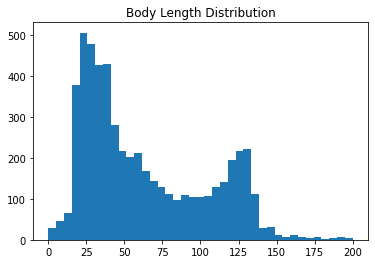

In [32]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

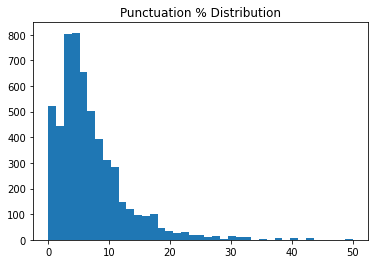

In [33]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

### Split into train/test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], 
                                                    data['label'], test_size=0.2)

### Vectorize text

In [35]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,10174,10175,10176,10177,10178,10179,10180,10181,10182,10183
0,19,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,121,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.250709,0.0,0.0,0.0,0.0,0.0
2,32,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,41,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### Final evaluation of models

In [36]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), 
    round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 2.613 / Predict time: 0.327 ---- Precision: 1.0 / Recall: 0.834 / Accuracy: 0.978


In [37]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), 
    round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 170.456 / Predict time: 0.217 ---- Precision: 0.953 / Recall: 0.834 / Accuracy: 0.973


____